In [1]:
import solver
from Models import chain
from bayes_opt import BayesianOptimization
import numpy as np
import matplotlib.pyplot as plt
from SubFunc import load_experiment_data

In [3]:
experimental_files = {'T':'./Data/demo_data/T.csv',
                     'C':'./Data/demo_data/C.csv',
                     'Chiz':'./Data/demo_data/Chiz.csv',
                     'Chixy':'./Data/demo_data/Chixy.csv'}

exp_thermal_data = load_experiment_data(experimental_files)

In [4]:
mymodel = chain.UniformSpinChain(l=8)
interactions = mymodel.generate_interactions(J=1)

In [5]:
mysolver = solver.ED_solver(size=mymodel.l)
# mysolver.get_hamiltonian_matrix(interactions)

In [6]:
thermal_data = mysolver.forward(interactions, T=exp_thermal_data.T)

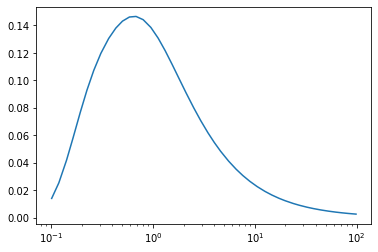

In [7]:
plt.semilogx(thermal_data.T, thermal_data.Chiz.detach().numpy())

In [8]:
from optimizer import BayesianOptimizer

In [9]:
Opt = BayesianOptimizer(parameter_space={'J':(-10, 10)},
                 n_exp_total=100,
                 solver=solver.ED_solver(size=mymodel.l),
                 model=mymodel,
                 exp_thermal_data=exp_thermal_data)

In [10]:
Opt.minimize()

iteration 0: Loss = 1.5242221204419517, Parameter is {'J': -5.1212461428157035}
iteration 1: Loss = 3.1630697877741594, Parameter is {'J': 1.2955666264217065}
iteration 2: Loss = 1.7758728384310312, Parameter is {'J': 2.1426611010568983}
iteration 3: Loss = 1.8146226891745567, Parameter is {'J': -1.499588110330981}
iteration 4: Loss = 0.9967066087942806, Parameter is {'J': 7.485704973032014}
iteration 5: Loss = 1.5129468729069155, Parameter is {'J': -5.242413231489989}
iteration 6: Loss = 1.2736903556833146, Parameter is {'J': 0.1538465816144079}
iteration 7: Loss = 1.5083059953551063, Parameter is {'J': -5.293475247904333}
iteration 8: Loss = 0.9527979183425054, Parameter is {'J': 9.603377322688878}
iteration 9: Loss = 1.802520620054698, Parameter is {'J': -2.8168473712976594}
iteration 10: Loss = 2.8190760566625497, Parameter is {'J': 1.102965078073249}
iteration 11: Loss = 2.738991703288453, Parameter is {'J': 1.4437482211526653}
iteration 12: Loss = 1.2499156372085178, Parameter is